In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Testing the projections

In [237]:
def project_onto_circle(x, y):
    if x**2 + y**2 <= 1.5:
        x_new = x
        y_new = y
    else:
        D = np.sqrt(x**2 + y**2)
        x_new = (x * np.sqrt(1.5)) /  D
        y_new = (y * np.sqrt(1.5)) /  D
    return x_new, y_new

def project_onto_square(x, y):
    if abs(x) < 1 and abs(y) < 1:
        new_x, new_y = x, y
    elif abs(x) > 1:
        if abs(y) > 1:
            new_x, new_y =  x/abs(x), y/abs(y)
        else:
            new_x, new_y = x/abs(x), y
    else:
        new_x, new_y = x, y/abs(y)
    return new_x, new_y

def project_onto_triangle(x, y):
    if x >= -1 and x <= 1.5 and y < -1:
        new_x, new_y = x, -1
    elif y >= -1 and y <= 1.5 and x < -1:
        new_x, new_y = -1, y
    elif  x < -1 and y < -1:
        new_x, new_y = -1, -1
    elif x > 1.5 and y < x - 2.5:
        new_x, new_y = 1.5, -1
    elif x < y - 2.5 and y > 1.5:
        new_x, new_y = -1, 1.5
    elif x >= -1 and x <= -y + 0.5 and y >= -1 and y <= -x + 0.5:
        new_x, new_y = x, y
    else:
        new_x, new_y = (x - y + 0.5) / 2, -((x - y + 0.5) / 2) + 0.5
    return new_x, new_y

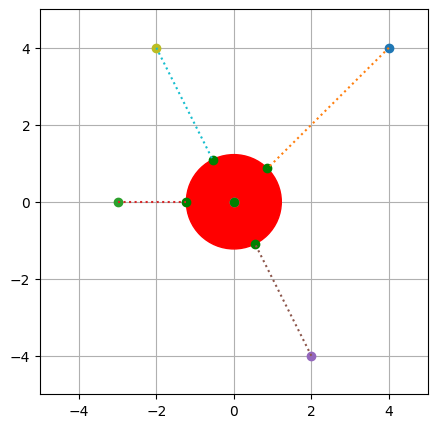

In [238]:
circle1 = plt.Circle((0, 0), np.sqrt(1.5), color='r')

fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4)]
for point in points:
    projected_point = project_onto_circle(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(circle1)


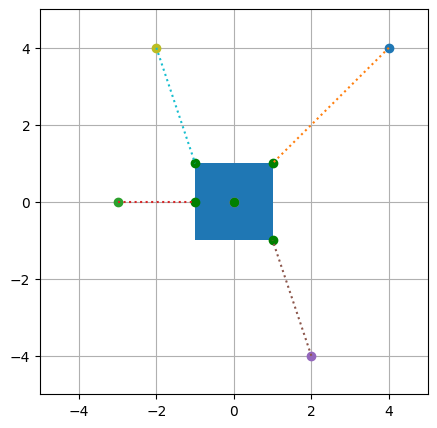

In [239]:
square = plt.Rectangle((-1,-1), 2, 2)
fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4)]
for point in points:
    projected_point = project_onto_square(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(square)

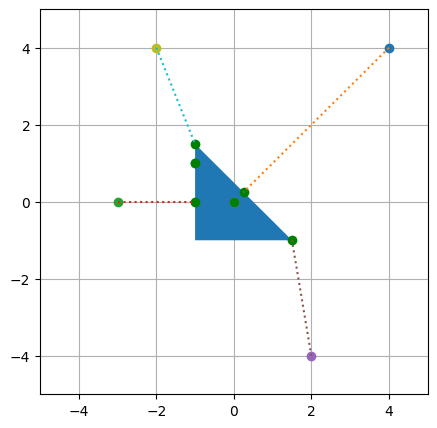

In [240]:
square = plt.Polygon([(-1,-1), (1.5,-1), (-1, 1.5)])
fig, ax = plt.subplots()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
fig.set_figwidth(5)
fig.set_figheight(5)
points = [(4,4), (-3,0), (2,-4), (0,0), (-2,4), (-1,1)]
for point in points:
    projected_point = project_onto_triangle(*point)
    ax.plot(*point, "o")
    ax.plot(* projected_point, "go")
    ax.plot(*zip(point, projected_point), linestyle="dotted")
ax.grid(True)
ax.set_axisbelow(True)
ax.add_patch(square)

In [241]:
def gradient_descent(point, gamma, gradient, n_iter=1):
    p = point
    points = []
    for _ in range(n_iter):
        p = p -gamma * gradient(*p)
        points.append(p)
    return p, points

Testing the algorithm on the already computed examples

In [242]:
def grad(x, y):
    return np.array([2*x, 4*y])
def fun(x, y):
    return x**2 + 2*y**2
starting_point = [1, 1]
print(gradient_descent(starting_point, 5/18, grad, 5)) #CORRECT RESULT
print(gradient_descent(starting_point, 3/10, grad)) #CORRECT RESULT
print(fun(*gradient_descent(starting_point, 5/18, grad)[0])) #CORRECT RESULT

(array([ 1.73415299e-02, -1.69350878e-05]), [array([ 0.44444444, -0.11111111]), array([0.19753086, 0.01234568]), array([ 0.0877915 , -0.00137174]), array([0.03901844, 0.00015242]), array([ 1.73415299e-02, -1.69350878e-05])])
(array([ 0.4, -0.2]), [array([ 0.4, -0.2])])
0.22222222222222224


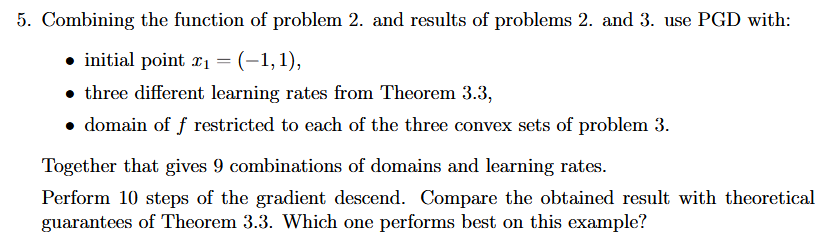

By plotting the derivatives in desmos we can get the following:\
x* = (-0.4325, -0.21625)

In [243]:
def projected_gradient_descent(point, gamma, gradient, projection, n_iter=1):
    p = projection(*point)
    points = []
    points.append(p)
    for _ in range(n_iter):
        p = projection(*(p -gamma * gradient(*p)))
        points.append(p)
    return p, points

In [244]:
def projected_gradient_descent_adaptive_gamma(point, alpha, gradient, projection, n_iter=1):
    p = projection(*point)
    points = []
    points.append(p)
    for i in range(n_iter):
        gamma = 2/(alpha*(i+2))
        p = projection(*(p -gamma * gradient(*p)))
        points.append(p)
    return p, points

In [245]:
def func(x, y):
    return x**2 + np.e**x + y**2 -x*y

def grad_func(x, y):
    return np.array([2*x + np.e**x - y, 2*y -x])


In [246]:
beta = 9.522
finish, points = projected_gradient_descent(np.array([-1, 1]), 1/beta, grad_func, project_onto_circle, 10)
print(finish)

(-0.3573714870585367, -0.09058593448247548)


In [247]:
shape_pairs = [(project_onto_circle, plt.Circle((0, 0), np.sqrt(1.5), color='r', ec="black", fc="none", ls="--")),
               (project_onto_square, plt.Rectangle((-1,-1), 2, 2, color='r', ec="black", fc="none", ls="--")),
               (project_onto_triangle, plt.Polygon([(-1,-1), (1.5,-1), (-1, 1.5)], color='r', ec="black", fc="none", ls="--"))]

(-0.3573714870585367, -0.09058593448247548) 0.8030599507629322
(-0.3556857004787623, -0.08413373650778726) 0.8043584491860291
(-0.3556857004787623, -0.08413373650778726) 0.8043584491860291


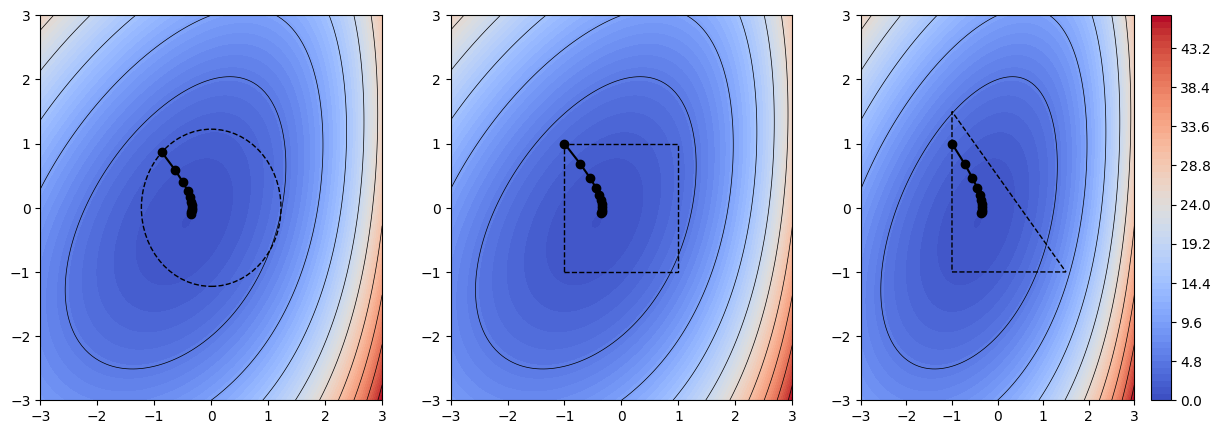

In [299]:
import copy
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
contour = plt.contourf(X, Y, Z, levels=60, cmap="coolwarm")
fig.colorbar(contour)
returned_points = []
for i, sp in enumerate(shape_pairs):
    ax[i].contourf(X, Y, Z, levels=60, cmap="coolwarm")
    finish, points = projected_gradient_descent(np.array([-1, 1]), 1/beta, grad_func, sp[0], 10)
    returned_points.append(points)
    print(finish, func(*finish))
    ax[i].contour(X, Y, Z, levels=10, colors="black", linewidths=0.5)
    ax[i].add_patch(copy.copy(sp[1]))
    ax[i].set_xlim(-3,3)
    for point in points:
        ax[i].plot(*point, "o", c="black")
    ax[i].plot(*zip(*points), "-", c="black", markersize=4, label="Projected Descent Path")


In [306]:
#Number corresponds to the statement number in theorem 3.3
def upper_bound_2(points, og_point, beta, fn):
    bounds = []
    start = points[0]
    squared_norm = np.square(np.linalg.norm(start - og_point))
    for i in range(len(points)):
        cur = points[i]
        bounds.append((3*beta*squared_norm + fn(*cur) - fn(*og_point))/(i+1))
    return bounds

In [314]:
ps = returned_points[0]
def plot_upper_bounds_2(points, og_point, func):
    diffs = []
    for i, p in enumerate(points):
        diffs.append(func(*p) - func(*og_point))
    plt.plot(range(1, len(diffs)+1), diffs)
    bounds = upper_bound_2(ps, og_point, beta, func)
    plt.plot(range(1, len(diffs)+1), bounds)
    plt.grid(True, alpha=0.3)
    plt.xlabel("K")
    plt.ylabel("y")
    print(len(ps))

11


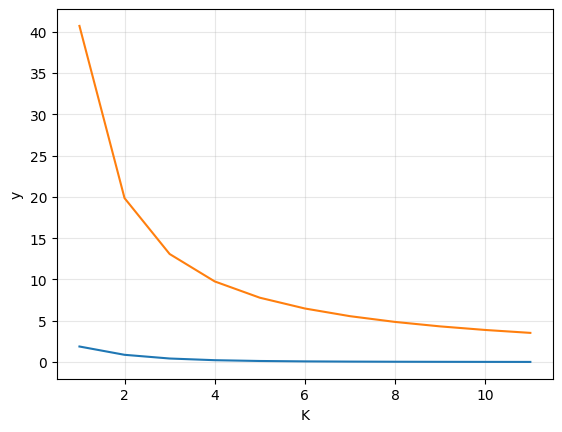

In [315]:
og_point = np.array([-0.4325, -0.21625])
plot_upper_bounds_2(ps, og_point, func)

In [340]:
def upper_bounds_3(points, og_point, beta, alpha):
    initial_point = points[0]
    kappa = beta / alpha
    squared_norm = np.square(np.linalg.norm(initial_point - og_point))
    coefficient = (kappa - 1) / kappa
    bounds = []
    for i in range(len(points)-1):
        bounds.append((beta / 2) * coefficient**(2 * (i + 1)) * squared_norm)
    return bounds

Text(0, 0.5, 'y')

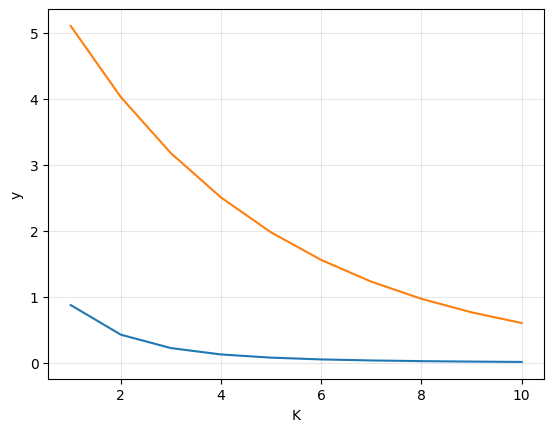

In [343]:
ps = returned_points[0]
alpha = 1.065
bounds3 = upper_bounds_3(points, og_point, beta, alpha)
diffs = []
for i, p in enumerate(ps):
    diffs.append(func(*p) - func(*og_point))
plt.plot(range(1, len(bounds3) + 1), diffs[1:]) #there is no bound for the first diff since indexing is k+1 in the theorem
plt.plot(range(1, len(bounds3) + 1), bounds3)
plt.grid(True, alpha=0.3)
plt.xlabel("K")
plt.ylabel("y")

In [318]:
alpha = 1.065
finish, points = projected_gradient_descent_adaptive_gamma(np.array([-1, 1]), alpha, grad_func, project_onto_circle, 10)
print(finish)

(-0.43408650563727874, -0.2183878394093698)


(-0.43408650563727874, -0.2183878394093698) 0.7891813385423434
(-0.4276847423525164, -0.20957685449681393) 0.7892208094896807
(-0.425556700794344, -0.20664283135442257) 0.7892674560462846


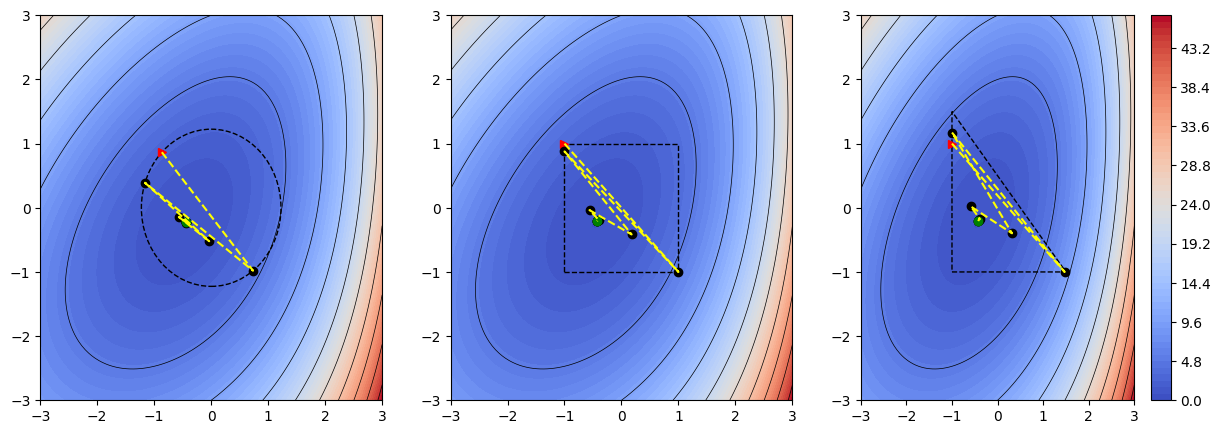

In [305]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
contour = plt.contourf(X, Y, Z, levels=60, cmap="coolwarm")
fig.colorbar(contour)
for i, sp in enumerate(shape_pairs):
    ax[i].contourf(X, Y, Z, levels=60, cmap="coolwarm")
    finish, points = projected_gradient_descent_adaptive_gamma(np.array([-1, 1]), alpha, grad_func, sp[0], 10)
    print(finish, func(*finish))
    ax[i].contour(X, Y, Z, levels=10, colors="black", linewidths=0.5)
    ax[i].add_patch(copy.copy(sp[1])) #it is weird to me that this is even necessary
    ax[i].set_xlim(-3,3)
    ax[i].plot(*points[0], ">r")
    for point in points[1:len(points)-1]:
        ax[i].plot(*point, "o", c="black")
    ax[i].plot(*points[-1], "og")
    ax[i].plot(*zip(*points), "--", c="yellow", markersize=4, label="Projected Descent Path")

In [ ]:
np.linalg.norm(np.array([1,1]))

1.4142135623730951

(-0.4018749470552942, 0.20817075029933274)
(-0.42797342241731273, 0.24640887873403378)
(-0.42797342241731273, 0.24640887873403378)


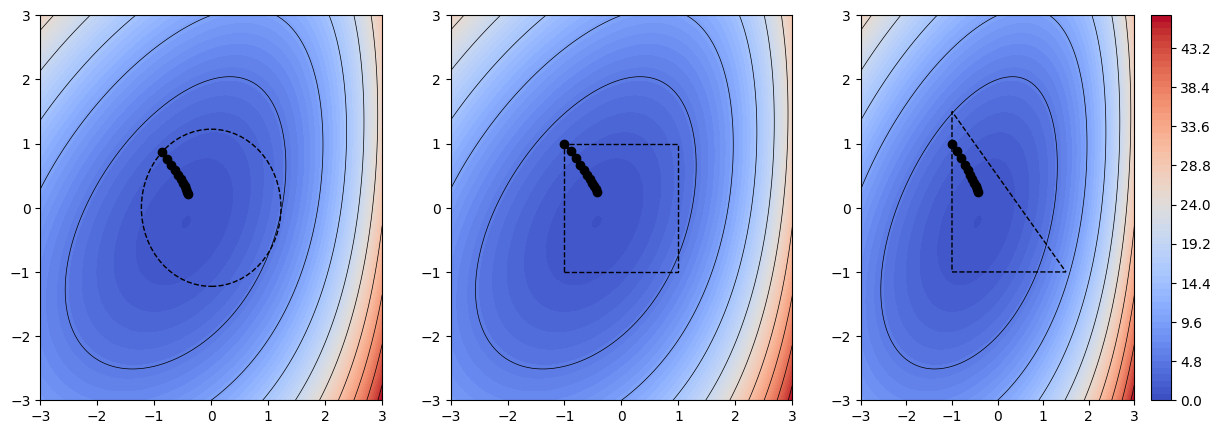

In [ ]:
import copy
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

T = 50
L = 14.672
gamma = np.linalg.norm(np.array([-1, 1]) - og_point) / (np.sqrt(T) * L)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
contour = plt.contourf(X, Y, Z, levels=60, cmap="coolwarm")
fig.colorbar(contour)
returned_points = []
for i, sp in enumerate(shape_pairs):
    ax[i].contourf(X, Y, Z, levels=60, cmap="coolwarm")
    finish, points = projected_gradient_descent(np.array([-1, 1]), gamma, grad_func, sp[0], 10)
    returned_points.append(points)
    print(finish)
    ax[i].contour(X, Y, Z, levels=10, colors="black", linewidths=0.5)
    ax[i].add_patch(copy.copy(sp[1]))
    ax[i].set_xlim(-3,3)
    for point in points:
        ax[i].plot(*point, "o", c="black")
    ax[i].plot(*zip(*points), "-", c="black", markersize=4, label="Projected Descent Path")
